In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import sklearn
import umap
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from collections import Counter

import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Creating an endocrine timing plot

## NKX6.1 and NEUROG3

In [63]:
base_dir = "/data/gl/g2/sachit/data/veres/perturbations/2_400_kegg_001500_seed_1_real/endocrine_axis/"
filenames=os.listdir(base_dir)
filenames.sort()

In [64]:
files[34]

'endocrine_2_over.pt'

In [65]:
differences=[]
paired_t=[]
for elt in filenames:
    print(elt)
    files=os.listdir(base_dir+elt)
    files.sort()
    results=torch.load(base_dir+elt+"/"+files[34])
    all_results = []
    all_results.append(results)
    endo_dist = []
    exo_dist = []
    endo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_std.append(tot/200)

    endo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["sc_beta"]+Counter(labs[-1])["sc_ec"]+Counter(labs[-1])["sc_alpha"]+Counter(labs[-1])["fev_high_isl_low"]+Counter(labs[-1])["neurog3_late"]+Counter(labs[-1])["neurog3_mid"]+Counter(labs[-1])["phox2a"]+Counter(labs[-1])["sst_hhex"]
        endo_counts_perturb.append(tot/200)

    exo_counts_std = []
    for labs in results["unperturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_std.append(tot/200)

    exo_counts_perturb = []
    for labs in results["perturbed_labs"]:
        tot=Counter(labs[-1])["exo"]
        exo_counts_perturb.append(tot/200)

    
    endo_dist.append(np.array([endo_counts_std, endo_counts_perturb]))
    exo_dist.append(np.array([exo_counts_std, exo_counts_perturb]))
    differences.append(endo_dist[0][1]-endo_dist[0][0])
    #differences.append(cohen_d(endo_dist[0][1], endo_dist[0][0]))

d0
d1
d2
d3
d4
d5
d6


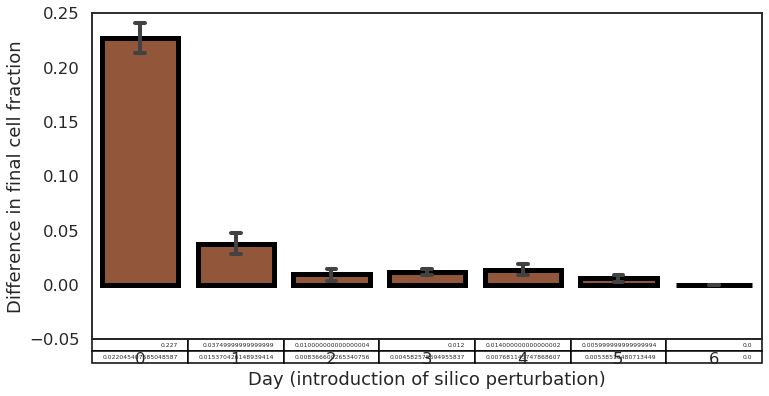

In [66]:
fig, ax = plt.subplots(figsize=(12,6), sharex=True, sharey=True)
#plt.bar(np.arange(0,8,1),differences)
sns.set_context("talk")
ax.set_ylim(-0.05,0.25)
#ax.title.set_text("Overexpression (z=5) introduced at different timepoints")
mypal=["sienna"]
g=sns.barplot(data=differences, palette=mypal, linewidth=5, edgexoolor="k",capsize=.1)
#plt.bar(np.arange(0,8,1),differences)
g.set_ylabel("Difference in final cell fraction")
g.set_xlabel("Day (introduction of silico perturbation)")
ax.table([np.average(differences, axis=1), np.std(differences, axis=1)])